**Importing Necessary Libraries**

In [ ]:
# Core Libraries
import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation
from google.colab import drive

# Deep Learning
import tensorflow as tf
from tensorflow.keras import layers, models  # For building the CNN

# Data Visualization
import matplotlib.pyplot as plt

# OS and Warnings
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # Suppress unnecessary TensorFlow warnings


TensorFlow can produce a lot of unnecessary logs.
Set os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' to suppress INFO, WARNING, and ERROR messages without affecting training.

In [ ]:
# Define constants for image processing and model training
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 10

# Define input shape for CNN (excluding batch size)
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)  # (Height, Width, Channels)


In [ ]:

# Mount Google Drive
drive.mount('/content/drive')

# Set the correct dataset path inside Google Drive
dataset_path = "/content/drive/MyDrive/ds_plantleaves_potato"  # Update if needed



Mounted at /content/drive


**Loading an Image Dataset from a Directory with TensorFlow**

In [ ]:
# Load dataset from the directory
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    label_mode='categorical'  # This ensures the labels are one-hot encoded




)
#label_mode='categorical'  # This ensures the labels are one-hot encoded

Found 2152 files belonging to 3 classes.


In [ ]:
# Check class names to verify correct loading
class_names = dataset.class_names
print("Classes:", class_names)  # Should print categories like 'Healthy', 'Late Blight', etc.


Classes: ['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']


In [ ]:
# Check total number of batches
print("Total batches:", len(dataset))


Total batches: 68


In [ ]:

# Check total images in dataset
total_images = len(dataset) * BATCH_SIZE  # Approximate count
print("Estimated total images:", total_images)


Estimated total images: 2176


**Exploratory Data Analysis(EDA)**

Inspecting Dataset Batches - **Data Inspection**

In [ ]:
# Verify batch details
for image_batch, label_batch in dataset.take(1):  # Take one batch
    print("Image batch shape:", image_batch.shape)  # Should be (Batch_Size, 256, 256, 3)
    print("Label batch:", label_batch.numpy())  # Print labels

Image batch shape: (32, 256, 256, 3)
Label batch: [[1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]]


Class Distribution Analysis

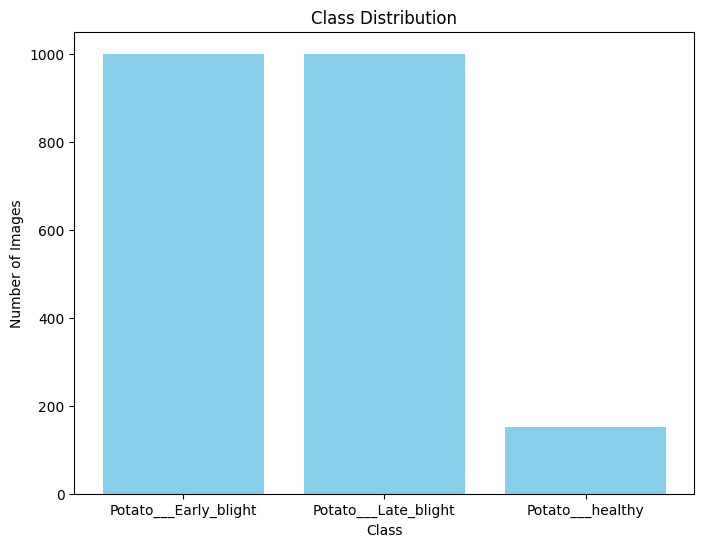

In [ ]:


# Assuming you have the dataset loaded as 'dataset'
class_names = dataset.class_names  # Get the class names (labels)

# Count the number of samples per class
class_counts = [0] * len(class_names)  # Initialize an empty list to store class counts

# Iterate over the dataset and count the occurrences of each class
for images, labels in dataset:
    for label in labels.numpy():  # labels are one-hot encoded, so we sum them
        class_counts[label] += 1

# Create a bar plot for class distribution
plt.figure(figsize=(8, 6))
plt.bar(class_names, class_counts, color='skyblue')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Class Distribution')
plt.show()


Checking Dimensions of Sample Images from the Dataset

In [ ]:


# Assuming 'dataset' is the variable containing the image dataset
image_sizes = []

# Get the first 3 images from the dataset and inspect their dimensions
for images, labels in dataset.take(1):  # 'take(1)' gets one batch of data
    for i, image in enumerate(images):
        if i < 3:  # Stop after checking the first 3 images
            image_sizes.append(image.shape)

# Convert to a numpy array for easier analysis
image_sizes = np.array(image_sizes)

# Print the dimensions of the first 3 images
print("Dimensions of first 3 images in dataset:")
for i, size in enumerate(image_sizes):
    print(f"Image {i+1} shape: {size}")


Dimensions of first 3 images in dataset:
Image 1 shape: [256 256   3]
Image 2 shape: [256 256   3]
Image 3 shape: [256 256   3]


Image Dimension and Pixel Intensity Analysis

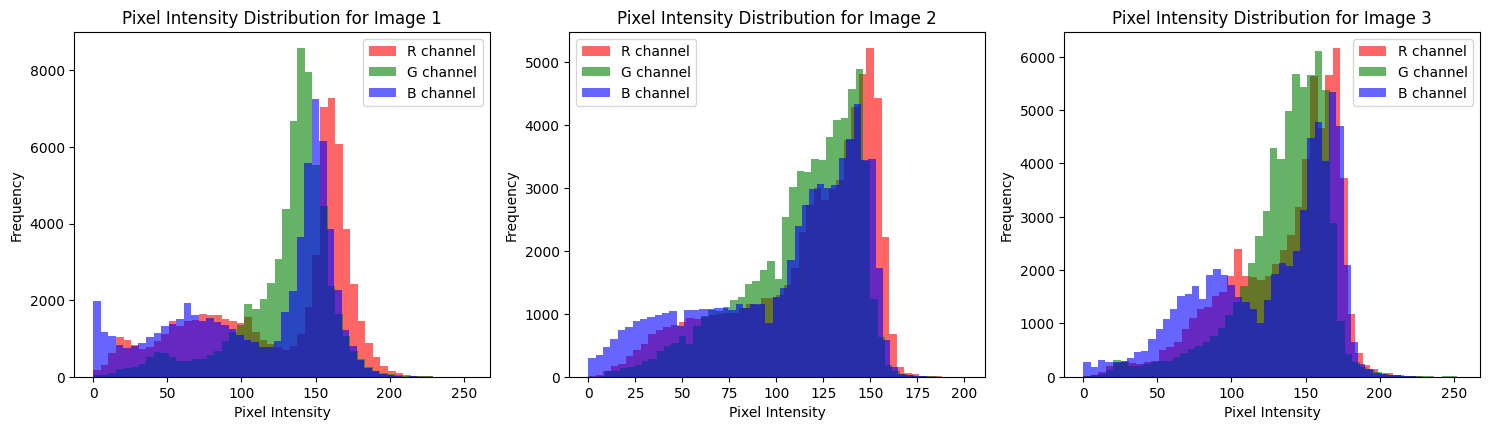

In [ ]:

# Sample 3 images from the dataset
sample_images = []
for images, labels in dataset.take(1):  # Take one batch from the dataset
    sample_images = images[:3]  # Take the first 3 images from the batch

# Create a figure to hold subplots for each image's pixel intensity distribution
plt.figure(figsize=(15, 8))

# Iterate over the sample images and plot histograms for each
for i, image in enumerate(sample_images):
    # Flatten the image to 1D array for each channel
    plt.subplot(2, 3, i + 1)
    plt.title(f"Pixel Intensity Distribution for Image {i + 1}")

    # Plot histogram for each of the three channels
    for channel, color in zip(range(3), ['r', 'g', 'b']):
        plt.hist(image[..., channel].numpy().flatten(), bins=50, color=color, alpha=0.6, label=f'{color.upper()} channel')

    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.legend()

# Display the plots
plt.tight_layout()
plt.show()


Viewing a Random Image and Its Label from the Dataset

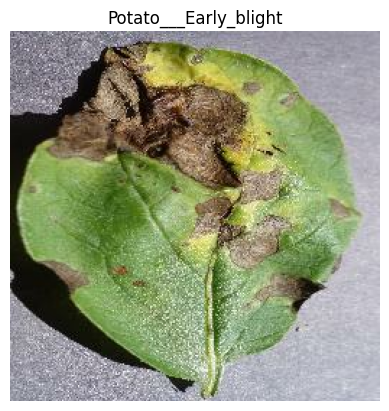

In [ ]:

# Viewing a Single Image
for image_batch, label_batch in dataset.take(1):  # Using the 'dataset' variable
    plt.imshow(image_batch[0].numpy().astype("uint8"))  # Display the first image in the batch
    plt.title(class_names[label_batch[0]])  # Title with the corresponding class name
    plt.axis("off")  # Turn off axis points
    plt.show()  # Show the image

# refreshing every time gives another picture and label as given

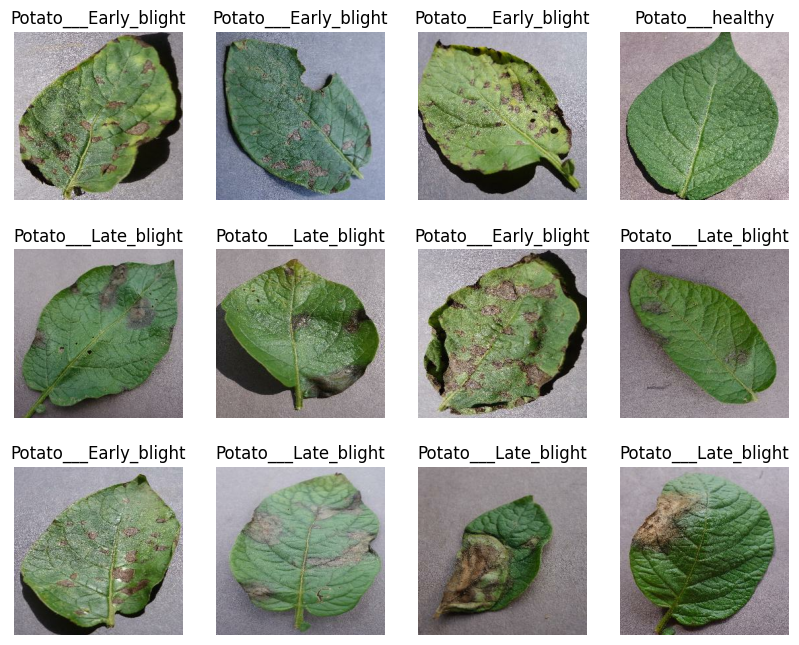

In [ ]:

# Refreshing and Viewing  Batch of Images
plt.figure(figsize=(10, 8))
for image_batch, label_batch in dataset.take(1):  # Use 'dataset'
    for i in range(12):  # Display 12 images
        plt.subplot(3, 4, i + 1)  # Create a 3x4 grid for images
        plt.imshow(image_batch[i].numpy().astype("uint8"))  # Convert to uint8 for proper display
        plt.title(class_names[label_batch[i]])  # Title with class name
        plt.axis('off')  # Turn off axes

plt.show()  # Show the figure

**Splitting Dataset**         
80% --> Training

20% --> 10% Validation and 10% Testing

In [ ]:
# channels (RGB[Red, Green, Blue]), Epochs = 10
CHANNELS = 3
EPOCHS = 10

In [ ]:
train_size = 0.8
validation_size = 0.1
test_size = 0.1

In [ ]:
# checking the length of training data


len(dataset)*train_size


54.400000000000006

In [ ]:

# length of validation and test data
val_n_test = len(dataset) - (len(dataset) * train_size)
val_n_test

13.599999999999994

In [ ]:
 test_ds = dataset.skip(54)
# #temporarily storing rest of the images as test in test_ds
len(test_ds)

14

In [ ]:
validation_size * len(dataset)


6.800000000000001

**Splitting a TensorFlow Dataset into Training, Validation, and Test Sets**

In [ ]:
def split_dataset(dataset, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_buffer_size=10000):
    """
    Splits a TensorFlow dataset into training, validation, and test sets.

    Parameters:
    - dataset (tf.data.Dataset): The input TensorFlow dataset to be split.
    - train_split (float): Proportion of the dataset to be used for training.
    - val_split (float): Proportion of the dataset to be used for validation.
    - test_split (float): Proportion of the dataset to be used for testing.
    - shuffle (bool): Whether to shuffle the dataset before splitting.
    - shuffle_buffer_size (int): Size of the buffer to use for shuffling.

    Returns:
    - train_dataset (tf.data.Dataset): The training dataset.
    - val_dataset (tf.data.Dataset): The validation dataset.
    - test_dataset (tf.data.Dataset): The test dataset.
    """

    # Determine the total number of samples in the dataset
    total_size = len(dataset)

    # Shuffle the dataset if requested
    if shuffle:
        dataset = dataset.shuffle(shuffle_buffer_size, seed=12)

    # Calculate the sizes of each dataset split
    train_size = int(train_split * total_size)
    val_size = int(val_split * total_size)
    test_size = total_size - train_size - val_size  # Remaining samples

    # Split the dataset dataset into training, validation, and test sets
    train_dataset = dataset.take(train_size)                       #  taking first 54 batches(out of 68) for training
    val_dataset = dataset.skip(train_size).take(val_size)     # Skipping training --first 54 and taking next 6 batches for validation samples
    test_dataset = dataset.skip(train_size + val_size)         # skipping first 54(train) batch and 6(validation) batch and taking left 8 batches  for testing



    return train_dataset, val_dataset, test_dataset



In [ ]:
# Using the function to split the dataset
train_ds, val_ds, test_ds = split_dataset(dataset)


In [ ]:

# Print the sizes of each dataset split
print("Total number of samples in the dataset:", len(dataset))
print("Number of Training Batches:", len(train_ds))  # Total training batches
print("Number of Validation Batches:", len(val_ds))  # Total validation batches
print("Number of Testing Batches:", len(test_ds))     # Total testing batches

Total number of samples in the dataset: 68
Number of Training Batches: 54
Number of Validation Batches: 6
Number of Testing Batches: 8


In [ ]:

# Optimize the datasets with caching and prefetching
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

**Data Preprocessing:**

Adding Resizing and Normalization Layers

Before passing images to the network, it is essential to resize them to a consistent size. Additionally, normalizing the pixel values by scaling them between 0 and 1 (dividing by 256) can enhance model performance.
Since both resizing and normalization are required during training and inference, they should be incorporated as layers within the Sequential model.



**Image Resizing and Normalization**

In [ ]:


#  Image Resizing and Normalization
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),  # Resize to target size
    layers.Rescaling(1.0 / 255)                # Normalize pixel values to [0, 1]
])


**Data Augmentation**

Data Augmentation is needed when we have less data, this boosts the accuracy of our model by augmenting the data.

In [ ]:
#Data Augmentation
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),  # Randomly flip images horizontally and vertically
    layers.RandomRotation(0.2),                    # Randomly rotate images by 20%
])

Applying Data Augmentation to **Train Dataset**

In [ ]:


#  Applying Data Augmentation to Training Dataset
train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)



Side-by-Side Visualization of Image Augmentation

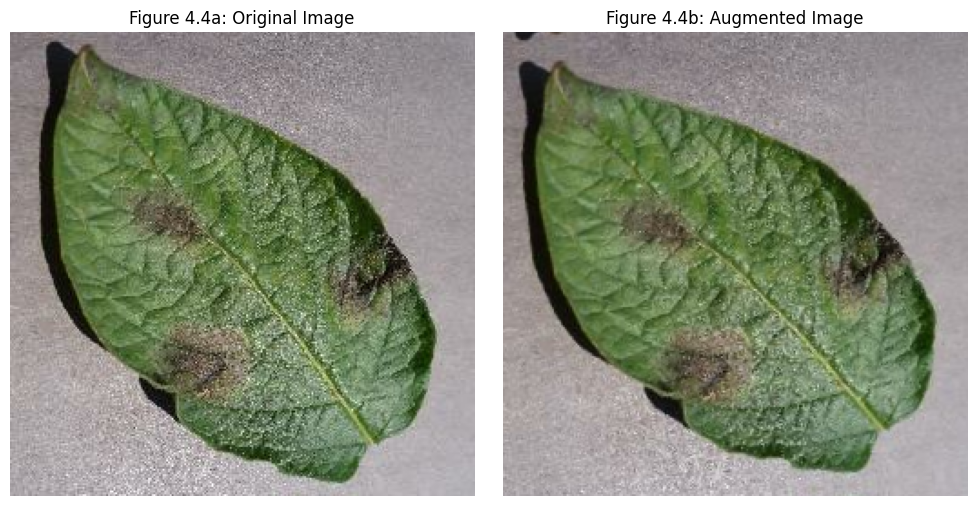

In [ ]:


# Pick one image manually
for images_batch, labels_batch in dataset.take(1):  # Take from original dataset
    original_image = images_batch[0]  # Select the first image
    break

# Apply augmentation manually
augmented_image = data_augmentation(tf.expand_dims(original_image, axis=0))[0]  # Apply and remove batch dimension

# Plot original and augmented images side-by-side
plt.figure(figsize=(10, 5))

# Plot original
plt.subplot(1, 2, 1)
plt.imshow(original_image.numpy().astype("uint8"))
plt.title("Figure 4.4a: Original Image")
plt.axis("off")

# Plot augmented
plt.subplot(1, 2, 2)
plt.imshow(augmented_image.numpy().astype("uint8"))
plt.title("Figure 4.4b: Augmented Image")
plt.axis("off")

plt.tight_layout()
plt.show()
